In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [8]:
import pandas as pd

chunks = pd.read_csv("C:/Users/Admin/Downloads/archive/US_Accidents_March23.csv", chunksize=500000)
df = pd.concat([next(chunks), next(chunks)])

df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
print(df.info())
print(df.describe())
print(df.isnull().sum().sort_values(ascending=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1000000 non-null  object 
 1   Source                 1000000 non-null  object 
 2   Severity               1000000 non-null  int64  
 3   Start_Time             1000000 non-null  object 
 4   End_Time               1000000 non-null  object 
 5   Start_Lat              1000000 non-null  float64
 6   Start_Lng              1000000 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1000000 non-null  float64
 10  Description            999999 non-null   object 
 11  Street                 998288 non-null   object 
 12  City                   999972 non-null   object 
 13  County                 1000000 non-null  object 
 14  State              

C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\2938253373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


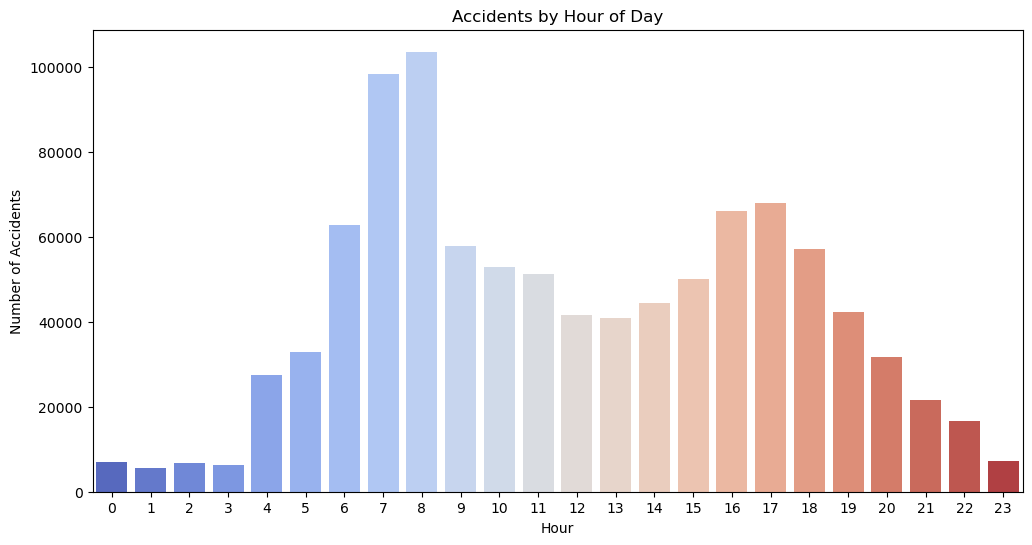

In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1635429924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().head(10).index, palette='viridis')


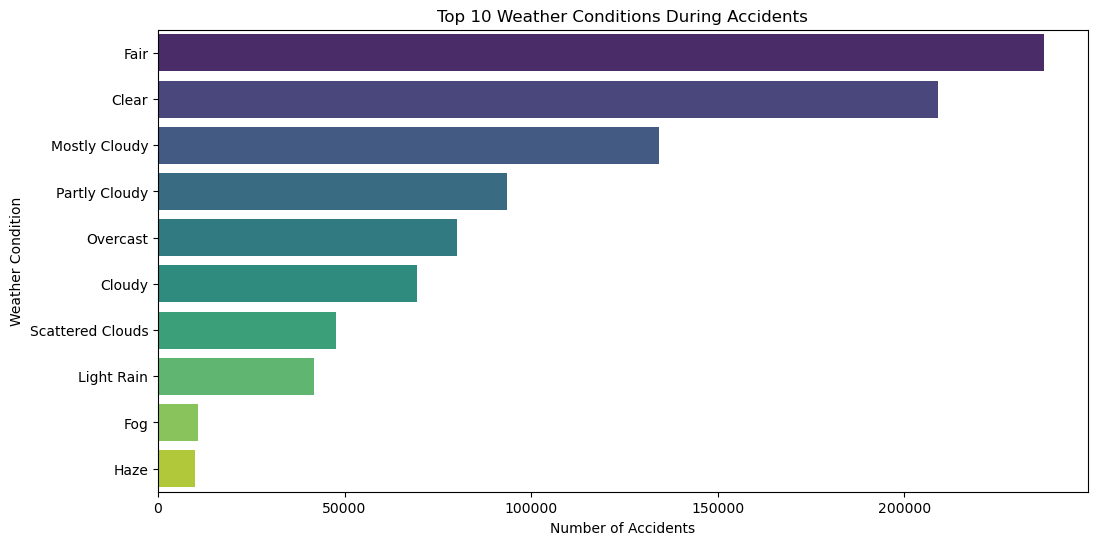

C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1635429924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='rocket')


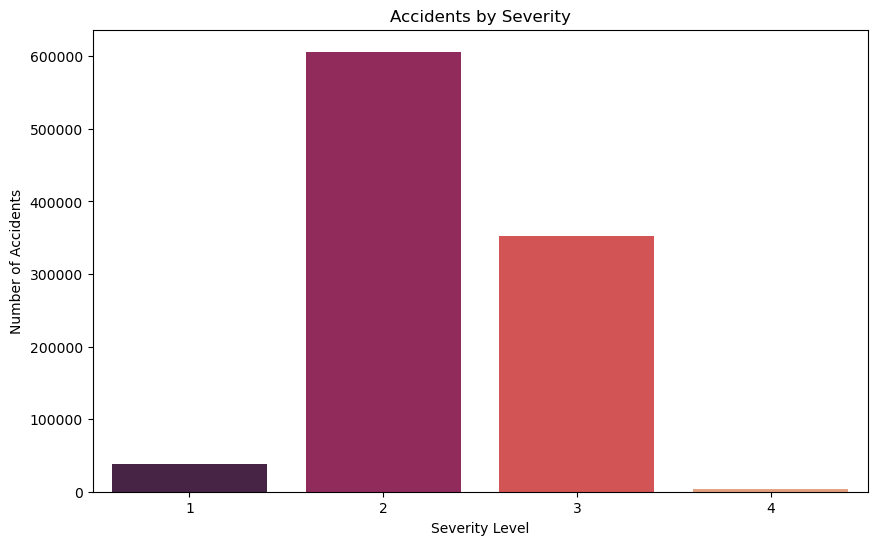

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Severity', data=df, palette='rocket')
plt.title('Accidents by Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()


In [16]:
import folium
from folium.plugins import HeatMap

# Filter rows with valid lat/lon
heat_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=5)  # USA center
HeatMap(data=heat_df.values, radius=8).add_to(m)

m.save("accident_hotspots_map.html")


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\476584608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')


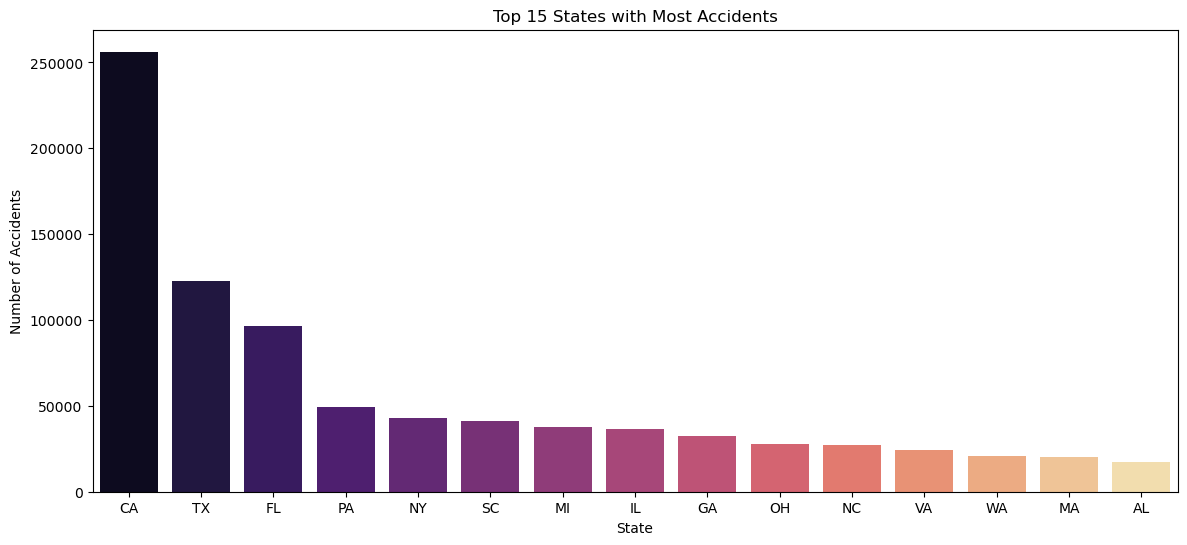

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
state_counts = df['State'].value_counts().head(15)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')
plt.title('Top 15 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\2096495084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')


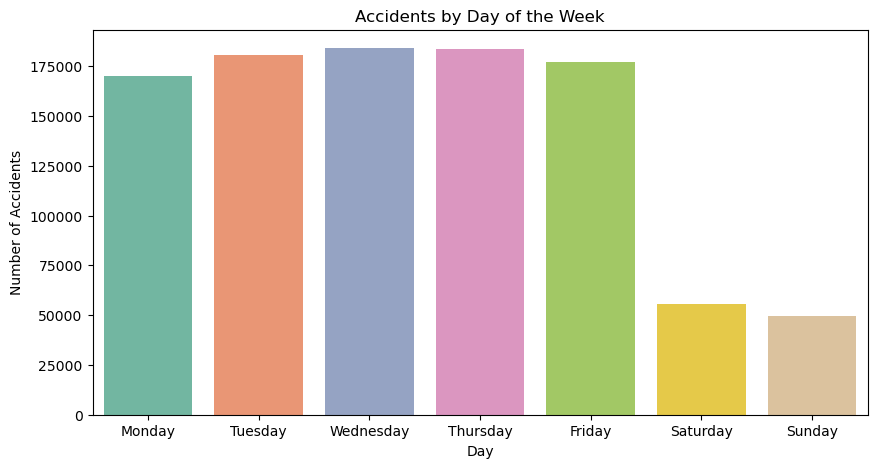

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1568310416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Temperature(F)', data=temp_severity, palette='cool')


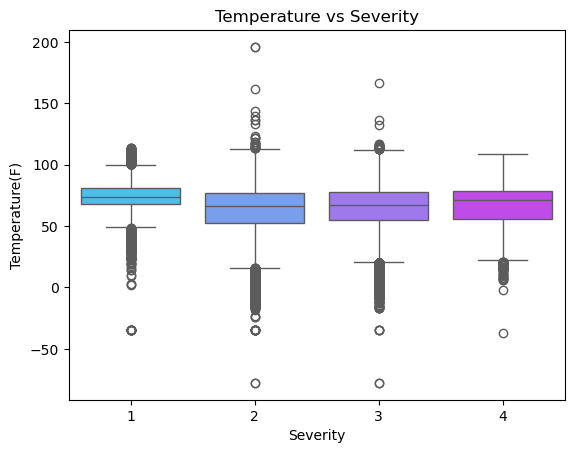

In [22]:
if 'Temperature(F)' in df.columns:
    temp_severity = df[['Temperature(F)', 'Severity']].dropna()
    sns.boxplot(x='Severity', y='Temperature(F)', data=temp_severity, palette='cool')
    plt.title('Temperature vs Severity')
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\2945293318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Visibility(mi)', data=df[['Visibility(mi)', 'Severity']].dropna(), palette='plasma')


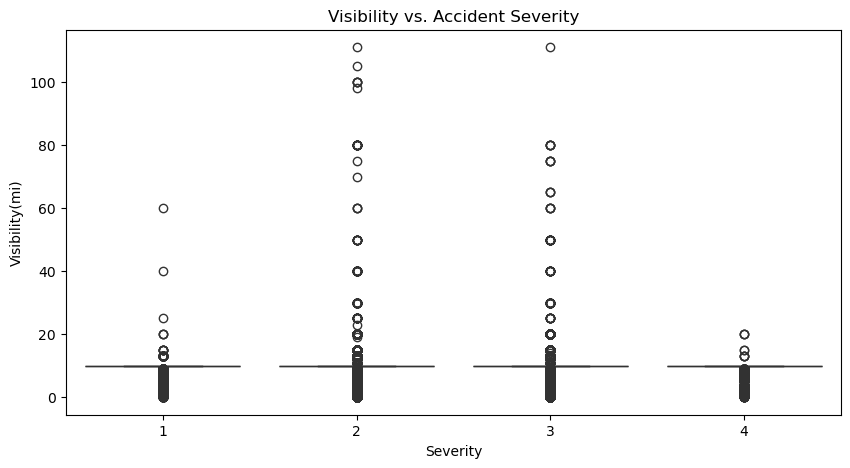

In [24]:
if 'Visibility(mi)' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Severity', y='Visibility(mi)', data=df[['Visibility(mi)', 'Severity']].dropna(), palette='plasma')
    plt.title('Visibility vs. Accident Severity')
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1892333403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rush_Hour', data=df, order=['Morning', 'Evening', 'Off Hours'], palette='cubehelix')


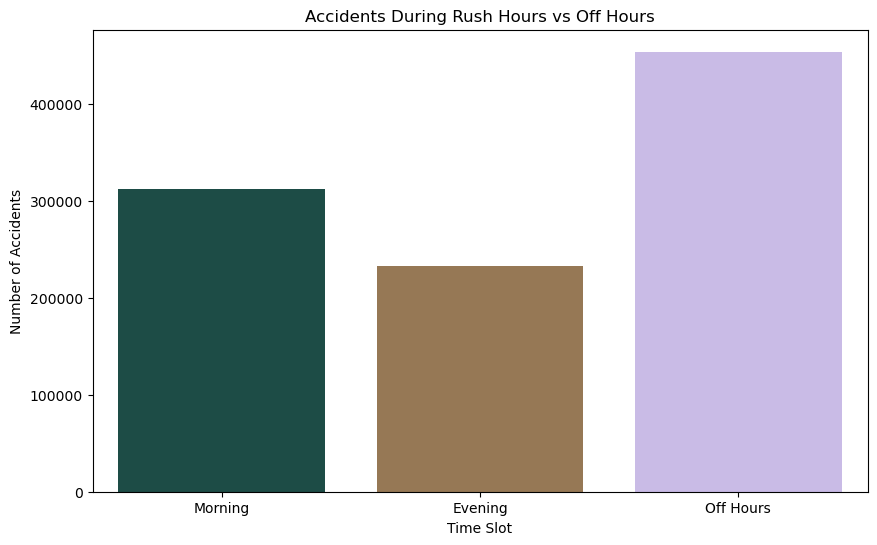

In [27]:
df['Rush_Hour'] = df['Hour'].apply(lambda x: 'Morning' if 7 <= x <= 10 else ('Evening' if 16 <= x <= 19 else 'Off Hours'))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Rush_Hour', data=df, order=['Morning', 'Evening', 'Off Hours'], palette='cubehelix')
plt.title('Accidents During Rush Hours vs Off Hours')
plt.xlabel('Time Slot')
plt.ylabel('Number of Accidents')
plt.show()


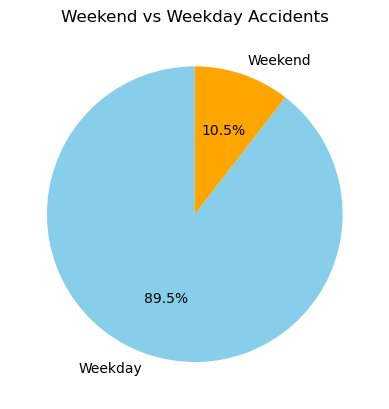

In [29]:
df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

weekend_data = df['Is_Weekend'].value_counts()

plt.pie(weekend_data, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title('Weekend vs Weekday Accidents')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1718329583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_Condition', y='Severity', data=filtered, palette='Set3')


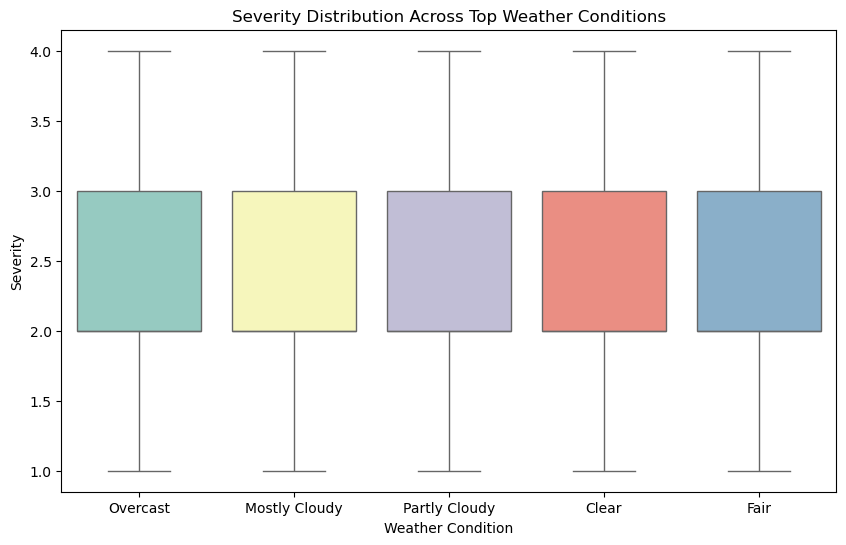

In [31]:
top_weather = df['Weather_Condition'].value_counts().head(5).index
filtered = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(10,6))
sns.boxplot(x='Weather_Condition', y='Severity', data=filtered, palette='Set3')
plt.title('Severity Distribution Across Top Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.show()


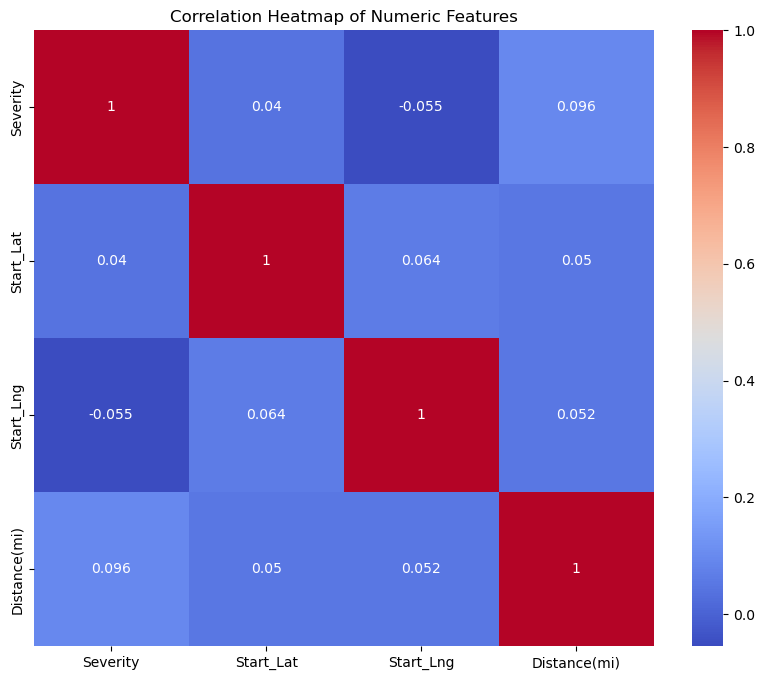

In [33]:
plt.figure(figsize=(10,8))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1058457413.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, order=['January','February','March','April','May','June','July','August','September','October','November','December'], palette='Spectral')


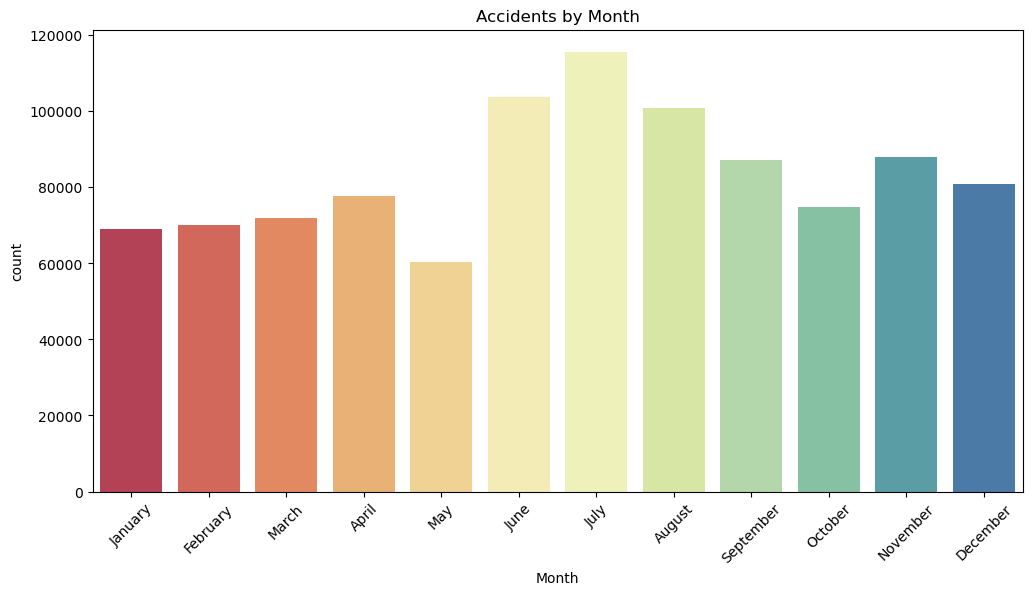

In [35]:
df['Month'] = df['Start_Time'].dt.month_name()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df, order=['January','February','March','April','May','June','July','August','September','October','November','December'], palette='Spectral')
plt.title('Accidents by Month')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18968\1952619593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_severity.index, y=state_severity.values, palette='rocket')


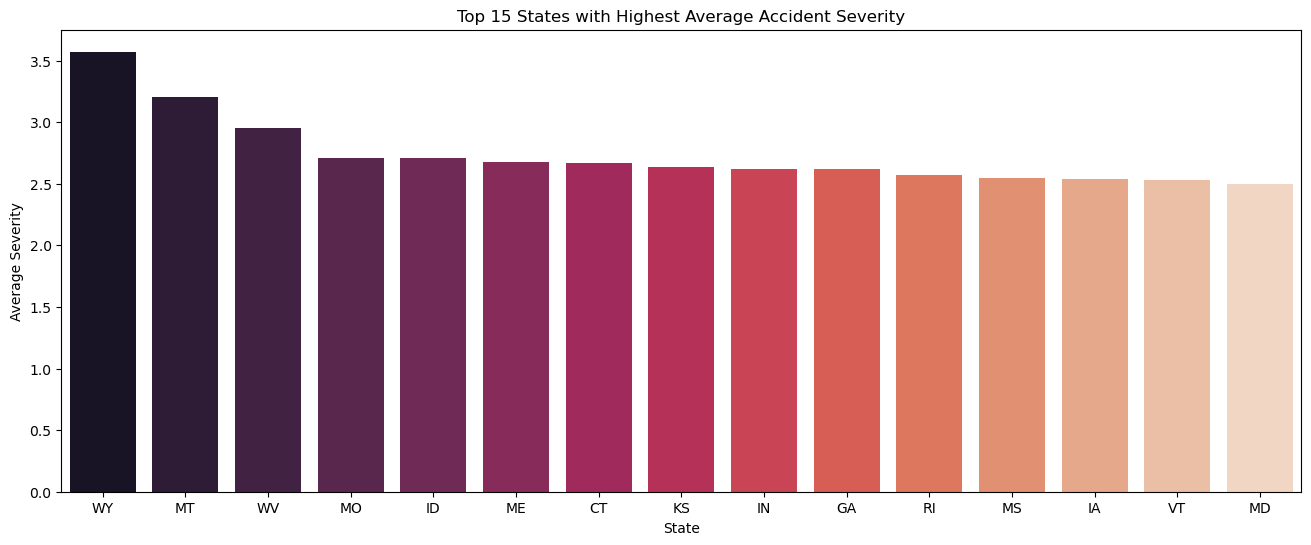

In [37]:
plt.figure(figsize=(16,6))
state_severity = df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=state_severity.index, y=state_severity.values, palette='rocket')
plt.title('Top 15 States with Highest Average Accident Severity')
plt.ylabel('Average Severity')
plt.xlabel('State')
plt.show()


In [39]:
df['Month'] = df['Start_Time'].dt.month_name()
monthly_accidents = df['Month'].value_counts().loc[
    ['January','February','March','April','May','June','July','August','September','October','November','December']
]
print("🔢 Accidents by Month:\n")
print(monthly_accidents)


🔢 Accidents by Month:

Month
January       69020
February      69958
March         71872
April         77813
May           60348
June         103604
July         115662
August       100801
September     87195
October       74854
November      87955
December      80918
Name: count, dtype: int64


In [41]:
state_severity = df.groupby('State')['Severity'].mean().sort_values(ascending=False)
print("📊 Average Severity by State:\n")
print(state_severity.head(15))


📊 Average Severity by State:

State
WY    3.571429
MT    3.200000
WV    2.955056
MO    2.712024
ID    2.709677
ME    2.674107
CT    2.671515
KS    2.632576
IN    2.622232
GA    2.618216
RI    2.572219
MS    2.543668
IA    2.534377
VT    2.528090
MD    2.499375
Name: Severity, dtype: float64


In [43]:
if 'Visibility(mi)' in df.columns:
    print("📉 Visibility (mi) - Mean by Severity:")
    print(df.groupby('Severity')['Visibility(mi)'].mean())
if 'Humidity(%)' in df.columns:
    print("\n💧 Humidity (%) - Mean by Severity:")
    print(df.groupby('Severity')['Humidity(%)'].mean())
if 'Pressure(in)' in df.columns:
    print("\n🧭 Pressure (in) - Mean by Severity:")
    print(df.groupby('Severity')['Pressure(in)'].mean())


📉 Visibility (mi) - Mean by Severity:
Severity
1    9.445337
2    9.151566
3    9.182520
4    9.127264
Name: Visibility(mi), dtype: float64

💧 Humidity (%) - Mean by Severity:
Severity
1    70.673678
2    66.731673
3    64.281152
4    68.514985
Name: Humidity(%), dtype: float64

🧭 Pressure (in) - Mean by Severity:
Severity
1    29.353458
2    29.719542
3    29.690020
4    29.242526
Name: Pressure(in), dtype: float64


In [45]:
top_cities = df['City'].value_counts().head(15)
print("🏙️ Top 15 Cities by Number of Accidents:\n")
print(top_cities)


🏙️ Top 15 Cities by Number of Accidents:

City
Houston         39763
Dallas          28160
Los Angeles     26561
Austin          22988
Atlanta         14400
Charlotte       13969
Orlando         11322
Miami           10874
Sacramento      10647
San Diego        8311
Seattle          8286
San Antonio      7938
Omaha            7765
Dayton           7730
Grand Rapids     6917
Name: count, dtype: int64


In [47]:
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration_Hours'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600
long_duration = df[df['Duration_Hours'] > 5]
print(f"⏱️ Number of accidents lasting more than 5 hours: {len(long_duration)}")
print(f"📈 Longest accident duration (in hours): {df['Duration_Hours'].max():.2f}")


⏱️ Number of accidents lasting more than 5 hours: 1500
📈 Longest accident duration (in hours): 5616.00


In [49]:
df['Start_Hour'] = df['Start_Time'].dt.hour
sun_times = df[df['Start_Hour'].isin([5,6,7,17,18,19])]
sunrise_sunset_count = sun_times['Start_Hour'].value_counts().sort_index()
print("🌅 Accidents during Sunrise/Sunset Hours (5–7 AM & 5–7 PM):\n")
print(sunrise_sunset_count)


🌅 Accidents during Sunrise/Sunset Hours (5–7 AM & 5–7 PM):

Start_Hour
5     32816
6     62841
7     98288
17    67836
18    57178
19    42233
Name: count, dtype: int64


In [51]:
if 'Distance(mi)' in df.columns:
    severity_dist = df.groupby('Severity')['Distance(mi)'].mean()
    print("🚗 Average Distance (mi) by Severity Level:\n")
    print(severity_dist)


🚗 Average Distance (mi) by Severity Level:

Severity
1    0.051910
2    0.081189
3    0.289304
4    4.499697
Name: Distance(mi), dtype: float64


In [53]:
df['Rush_Hour'] = df['Hour'].apply(lambda x: 'Morning' if 7 <= x <= 10 else ('Evening' if 16 <= x <= 19 else 'Off Hours'))
rush_counts = df['Rush_Hour'].value_counts()
print("⏰ Accidents During Rush Hours:\n")
print(rush_counts)


⏰ Accidents During Rush Hours:

Rush_Hour
Off Hours    454273
Morning      312501
Evening      233226
Name: count, dtype: int64


In [55]:
total_accidents = len(df)
unique_states = df['State'].nunique()
unique_cities = df['City'].nunique()

print(f"📦 Total number of accidents: {total_accidents}")
print(f"🌎 Total unique states involved: {unique_states}")
print(f"🏙️ Total unique cities reported: {unique_cities}")


📦 Total number of accidents: 1000000
🌎 Total unique states involved: 49
🏙️ Total unique cities reported: 8741


In [57]:
severe_count = df[df['Severity'] == 4].shape[0]
percentage_severe = (severe_count / total_accidents) * 100

print(f"🚨 Accidents with Severity 4: {severe_count} ({percentage_severe:.2f}%)")


🚨 Accidents with Severity 4: 3197 (0.32%)


In [59]:
if 'Weather_Condition' in df.columns:
    weather_counts = df['Weather_Condition'].value_counts().head(10)
    print("🌦️ Top 10 Most Common Weather Conditions During Accidents:\n")
    print(weather_counts)


🌦️ Top 10 Most Common Weather Conditions During Accidents:

Weather_Condition
Fair                237311
Clear               208905
Mostly Cloudy       134344
Partly Cloudy        93409
Overcast             80265
Cloudy               69424
Scattered Clouds     47595
Light Rain           41845
Fog                  10837
Haze                  9960
Name: count, dtype: int64


In [61]:
if 'Street' in df.columns:
    common_streets = df['Street'].value_counts().head(10)
    print("🛣️ Top 10 Most Frequent Streets for Accidents:\n")
    print(common_streets)


🛣️ Top 10 Most Frequent Streets for Accidents:

Street
I-5 N       9258
I-95 N      8596
I-95 S      7675
I-10 E      7115
I-10 W      6817
I-405 N     6059
I-80 W      5837
I-80 E      4980
I-75 N      4926
US-101 N    4712
Name: count, dtype: int64


In [63]:
highways = df[df['Street'].str.contains("Highway|Hwy|Route|Freeway|Interstate", na=False, case=False)]
print(f"🛤️ Number of highway-related accidents: {len(highways)}")


🛤️ Number of highway-related accidents: 57262


In [65]:
common_start_times = df['Start_Time'].dt.hour.value_counts().sort_index()
print("⏰ Accidents by Hour of Day:\n")
print(common_start_times)


⏰ Accidents by Hour of Day:

Start_Time
0       7072
1       5593
2       6844
3       6359
4      27365
5      32816
6      62841
7      98288
8     103530
9      57916
10     52767
11     51330
12     41558
13     40766
14     44333
15     50070
16     65979
17     67836
18     57178
19     42233
20     31740
21     21594
22     16678
23      7314
Name: count, dtype: int64


In [67]:
longest_accidents = df.sort_values(by='Duration_Hours', ascending=False).head(5)[['City', 'State', 'Duration_Hours', 'Weather_Condition', 'Severity']]
print("⏳ Top 5 Longest Duration Accidents with Conditions:\n")
print(longest_accidents)


⏳ Top 5 Longest Duration Accidents with Conditions:

                    City State  Duration_Hours Weather_Condition  Severity
391245        Fort Worth    TX     5616.000000        Light Rain         2
436505        Ellensburg    WA     1383.709444     Mostly Cloudy         3
589913        Pittsburgh    PA      381.990278     Mostly Cloudy         2
636910        Texas City    TX      314.801111            Cloudy         3
734391  Saint Petersburg    FL      197.359167              Fair         3


In [69]:
df['Is_Dark'] = df['Start_Hour'].apply(lambda x: x < 6 or x > 18)
dark_accidents = df[df['Is_Dark'] == True]
day_accidents = df[df['Is_Dark'] == False]

print("🌙 Accidents during dark hours (before 6AM or after 6PM):")
print(f"Count: {len(dark_accidents)}")
print(f"Average Severity: {dark_accidents['Severity'].mean():.2f}")

print("\n☀️ Accidents during daylight (6AM–6PM):")
print(f"Count: {len(day_accidents)}")
print(f"Average Severity: {day_accidents['Severity'].mean():.2f}")


🌙 Accidents during dark hours (before 6AM or after 6PM):
Count: 205608
Average Severity: 2.37

☀️ Accidents during daylight (6AM–6PM):
Count: 794392
Average Severity: 2.31


📦 Total Accidents in Sample: 100000
🌎 Unique States: 3
🚨 Severity Count:
 Severity
2    55025
3    44844
1       98
4       33
Name: count, dtype: int64


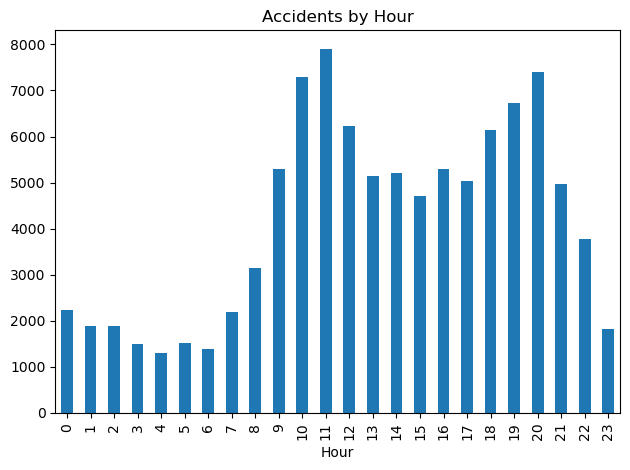

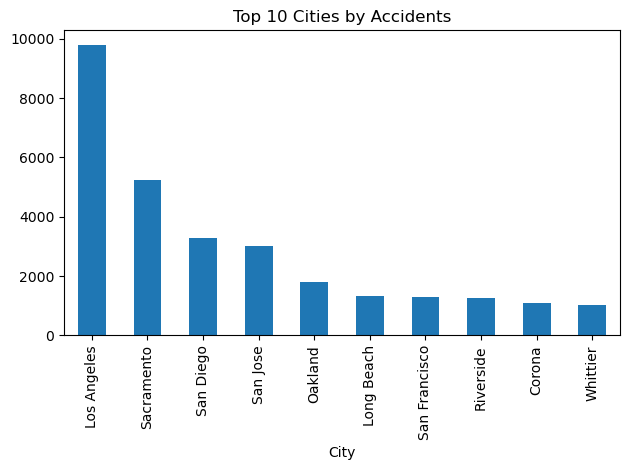

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load a sample only
df = pd.read_csv("C:/Users/Admin/Downloads/archive/US_Accidents_March23.csv", nrows=100000, parse_dates=['Start_Time', 'End_Time'])

df['Month'] = df['Start_Time'].dt.month_name()
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour
df['Duration_Hours'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

# Example fast text and plot output
print("📦 Total Accidents in Sample:", len(df))
print("🌎 Unique States:", df['State'].nunique())
print("🚨 Severity Count:\n", df['Severity'].value_counts())

# Accidents per Hour
df['Hour'].value_counts().sort_index().plot(kind='bar', title='Accidents by Hour')
plt.tight_layout()
plt.show()

# Top 10 Cities
df['City'].value_counts().head(10).plot(kind='bar', title='Top 10 Cities by Accidents')
plt.tight_layout()
plt.show()
